In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
import statsmodels.api as sm
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [4]:
STATS = ['PTS', 'FG2M', 'FG2A', 'FG2_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'DREB', 'OREB', 'AST', 'STL', 'BLK', 'TOV', 'PF']
AVG_STATS = ['AVG_'+stat for stat in STATS]
OPP_AVG_STATS = ['OPP_'+stat for stat in AVG_STATS]
TRAIN_STATS = ['HOME']+AVG_STATS+OPP_AVG_STATS

In [5]:
data = pd.read_csv('dat/expanding_avg_1983-2017.csv', index_col=0)

In [7]:
# drop if first game for either team
data = data.loc[~data[['AVG_PTS', 'OPP_AVG_PTS']].isna().any(axis=1)]

In [8]:
# drop away games
data = data.loc[data['HOME'] == 1]

In [9]:
X = data
y = data['W']
logit_model = sm.Logit(y, X[TRAIN_STATS])
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.606556
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      W   No. Observations:                38334
Model:                          Logit   Df Residuals:                    38299
Method:                           MLE   Df Model:                           34
Date:                Wed, 20 Jun 2018   Pseudo R-squ.:                 0.09192
Time:                        22:06:54   Log-Likelihood:                -23252.
converged:                       True   LL-Null:                       -25605.
                                        LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
HOME               -3.0229      2.418     -1.250      0.211      -7.763       1.717
AVG_PTS       

# Accuracy of training

In [10]:
logreg = LogisticRegression()
logreg.fit(X[TRAIN_STATS], y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
y_pred = logreg.predict(X[TRAIN_STATS])
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X[TRAIN_STATS], y)))

Accuracy of logistic regression classifier on test set: 0.67


# Train on 70% and test 30%

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
logreg = LogisticRegression()
logreg.fit(X_train[TRAIN_STATS], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
y_pred = logreg.predict(X_test[TRAIN_STATS])
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test[TRAIN_STATS], y_test)))

Accuracy of logistic regression classifier on test set: 0.67


In [14]:
season_results = {}

In [15]:
for season in set(X['SEASON_ID'].values):
    X_train = X.loc[X['SEASON_ID'] != season]
    X_test = X.loc[X['SEASON_ID'] == season]
    y_train = X_train['W']
    y_test = X_test['W']

    logreg = LogisticRegression()
    logreg.fit(X_train[TRAIN_STATS], y_train)

    y_pred = logreg.predict(X_test[TRAIN_STATS])
    accuracy = logreg.score(X_test[TRAIN_STATS], y_test)
    season_results[season] = accuracy
    print('{}: Accuracy of logistic regression classifier on test set: {:.2f}'.format(season, accuracy))

22016: Accuracy of logistic regression classifier on test set: 0.64
22017: Accuracy of logistic regression classifier on test set: 0.65
21983: Accuracy of logistic regression classifier on test set: 0.66
21984: Accuracy of logistic regression classifier on test set: 0.68
21985: Accuracy of logistic regression classifier on test set: 0.66
21986: Accuracy of logistic regression classifier on test set: 0.71
21987: Accuracy of logistic regression classifier on test set: 0.70
21988: Accuracy of logistic regression classifier on test set: 0.71
21989: Accuracy of logistic regression classifier on test set: 0.71
21990: Accuracy of logistic regression classifier on test set: 0.70
21991: Accuracy of logistic regression classifier on test set: 0.68
21992: Accuracy of logistic regression classifier on test set: 0.66
21993: Accuracy of logistic regression classifier on test set: 0.71
21994: Accuracy of logistic regression classifier on test set: 0.68
21995: Accuracy of logistic regression classifie

In [16]:
res = sorted(season_results.items(), key=lambda x: x[0])
x = list(map(lambda x: "'" + str(int(x[0]))[3:], res))
y = list(map(lambda x: x[1], res))

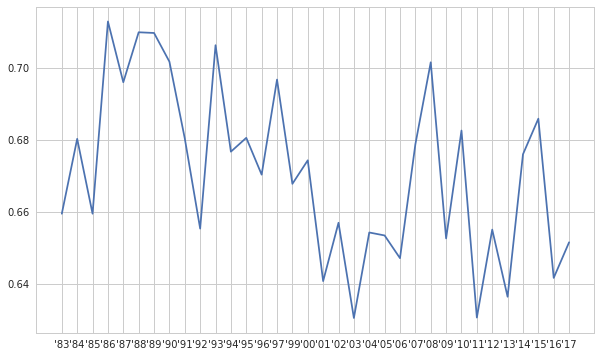

In [17]:
fig = plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.show()